# Tsunami Prediction Model

## Import and prepare the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/earthquake_data_tsunami.csv')
raw_data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


### Drop columns that leak information or add bias 

In [3]:
data = raw_data.drop(columns=['Year', 'Month'])
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,1


### Check Multicollinearity

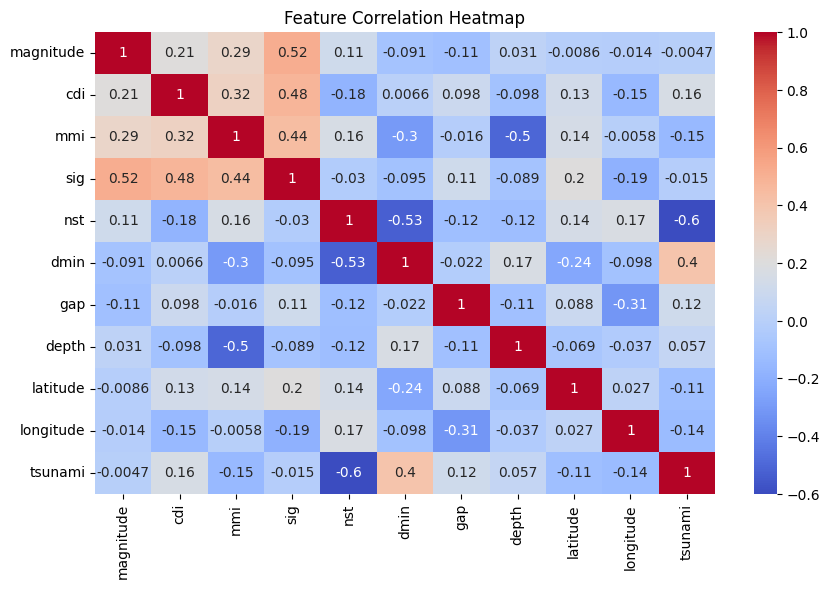

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

### Define Features

In [5]:
X = data[['magnitude', 'depth', 'mmi', 'latitude', 'longitude']]
y = data['tsunami']

### Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Scale 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

### random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=300,
                       random_state=42)

### Evaluations

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {'Logistic Regression': log_model, 'Random Forest': rf_model}

for name, model in models.items():
    preds = model.predict(X_test_scaled)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, preds))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.64      0.89      0.74        96
           1       0.54      0.21      0.31        61

    accuracy                           0.62       157
   macro avg       0.59      0.55      0.52       157
weighted avg       0.60      0.62      0.57       157

ROC-AUC: 0.5492657103825136

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        96
           1       0.52      0.48      0.50        61

    accuracy                           0.62       157
   macro avg       0.60      0.60      0.60       157
weighted avg       0.62      0.62      0.62       157

ROC-AUC: 0.5970799180327868


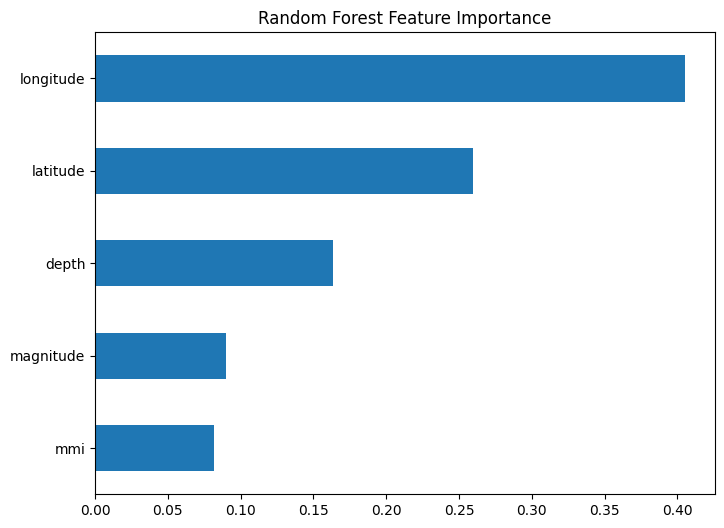

In [14]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot.barh(figsize=(8,6))
plt.title("Random Forest Feature Importance")
plt.show()